In [36]:
#!pip install Jinja2

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [38]:
df = pd.read_csv("../data/energy_and_weather.csv",delimiter=',',encoding='UTF-8')

In [39]:
def timestamp_to_datetime(timestamp):
    date_str = timestamp.split(' ')[0]
    time_str = timestamp.split(' ')[1]
    datetime_obj = datetime.datetime(int(date_str.split('-')[0]), int(date_str.split('-')[1] ), int(date_str.split('-')[2]),int(time_str[:2]), int(time_str[3:4]))
    return datetime_obj
    

In [40]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [41]:
df['day'] = [x.day for x in df['timestamp']]
df['month'] = [x.month for x in df['timestamp']]
df['year'] = [x.year for x in df['timestamp']]
df['hour'] = [x.hour for x in df['timestamp']]
#minute not imp if we're sampling hourly
#df['minute'] = [x.minute for x in df['timestamp']] 

### Considering only electricity usage as energy type

In [42]:
df = df[['timestamp', 'district_heating','Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [43]:
df

,timestamp,district_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
0,2021-06-14 01:00:00,0.00,13.881370,0.0,0.0,0.0,57.0,1,14,6,2021,1
1,2021-06-14 02:00:00,0.00,12.711369,0.0,0.0,0.0,61.0,1,14,6,2021,2
2,2021-06-14 03:00:00,0.00,11.861369,0.0,0.0,0.0,63.0,1,14,6,2021,3
3,2021-06-14 04:00:00,0.00,11.341370,0.0,0.0,0.0,65.0,1,14,6,2021,4
4,2021-06-14 05:00:00,0.00,11.041369,0.0,0.0,0.0,64.0,1,14,6,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2021-12-31 20:00:00,0.00,9.641370,0.0,0.0,0.0,76.0,0,31,12,2021,20
4820,2021-12-31 21:00:00,0.01,9.391370,0.0,0.0,0.0,68.0,0,31,12,2021,21
4821,2021-12-31 22:00:00,0.01,9.591370,0.0,0.0,0.0,59.0,0,31,12,2021,22
4822,2021-12-31 23:00:00,0.00,9.331369,0.0,0.0,0.0,53.0,0,31,12,2021,23


In [44]:
df.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_16089/543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,district_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
district_heating,1.000000,-0.554892,-0.224093,-0.217290,-0.224704,0.330782,0.072332,0.008005,0.538495,-0.008118,-0.043241
Graz Temperature [2 m elevation corrected],-0.554892,1.000000,0.532224,0.525205,0.517221,-0.662363,-0.214388,-0.015580,-0.869243,-0.012742,0.181152
Graz Shortwave Radiation,-0.224093,0.532224,1.000000,0.989775,0.966476,-0.650180,-0.083599,-0.006758,-0.345122,-0.010554,0.208580
Graz Direct Shortwave Radiation,-0.217290,0.525205,0.989775,1.000000,0.919971,-0.637764,-0.080994,-0.006254,-0.343855,-0.009817,0.194809
Graz Diffuse Shortwave Radiation,-0.224704,0.517221,0.966476,0.919971,1.000000,-0.638765,-0.083946,-0.007313,-0.329480,-0.011331,0.222537
Graz Relative Humidity [2 m],0.330782,-0.662363,-0.650180,-0.637764,-0.638765,1.000000,0.114905,0.020575,0.499004,0.002943,-0.323486
is_schoolday,0.072332,-0.214388,-0.083599,-0.080994,-0.083946,0.114905,1.000000,-0.082616,0.192872,-0.012702,0.000694
day,0.008005,-0.015580,-0.006758,-0.006254,-0.007313,0.020575,-0.082616,1.000000,-0.102731,-0.025233,0.000511
month,0.538495,-0.869243,-0.345122,-0.343855,-0.329480,0.499004,0.192872,-0.102731,1.000000,-0.061840,0.000902
year,-0.008118,-0.012742,-0.010554,-0.009817,-0.011331,0.002943,-0.012702,-0.025233,-0.061840,1.000000,-0.023922


In [45]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['district_heating']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Fitting district_heating DTR model

### Decision Tree Regressor

In [47]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [49]:
mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))

Perfomance for test set 0.43


<Figure size 640x480 with 0 Axes>

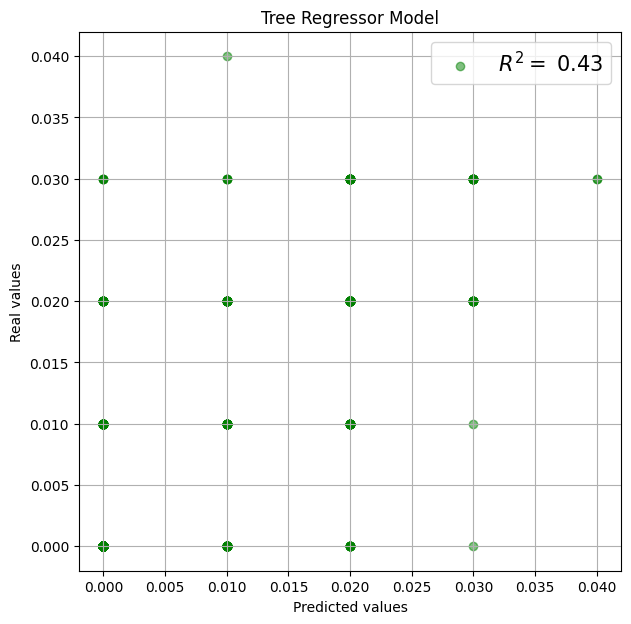

In [50]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
district_heating,4824.0,0.004959,0.008796,0.000000,0.00000,0.000000,0.010000,0.040000
Graz Temperature [2 m elevation corrected],4824.0,14.924981,8.830604,-3.458630,7.46137,15.471369,22.201370,34.121372
Graz Shortwave Radiation,4824.0,180.286804,246.010558,0.000000,0.00000,12.460000,329.300000,888.220000
Graz Direct Shortwave Radiation,4824.0,109.849497,161.140322,-8.570068,0.00000,3.896466,187.765255,603.423100
Graz Diffuse Shortwave Radiation,4824.0,70.437306,89.518911,0.000000,0.00000,5.975124,140.326493,295.416660
Graz Relative Humidity [2 m],4824.0,61.180348,13.795965,28.000000,51.00000,61.000000,71.000000,98.000000
is_schoolday,4824.0,0.437604,0.496143,0.000000,0.00000,0.000000,1.000000,1.000000
day,4824.0,16.355514,8.763619,1.000000,9.00000,17.000000,24.000000,31.000000
month,4824.0,9.197968,1.909085,1.000000,8.00000,9.000000,11.000000,12.000000
year,4824.0,2021.000207,0.014398,2021.000000,2021.00000,2021.000000,2021.000000,2022.000000


In [52]:
test_df = X_test
test_df['fernwarme_pred'] = DTRPred
test_df['fernwarme__real'] = y_test

In [53]:
test_df

,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,hour,fernwarme_pred,fernwarme__real
3221,3.811370,0.00000,0.000000,0.000000,63.0,0,26,10,6,0.02,0.01
1117,29.321371,825.92000,556.270500,269.649500,42.0,0,30,7,14,0.00,0.01
468,25.281370,856.18000,583.188960,272.991030,30.0,0,3,7,13,0.00,0.00
1129,23.221370,0.00000,0.000000,0.000000,61.0,0,31,7,2,0.00,0.00
2754,14.541369,1.78000,0.056351,1.723649,68.0,1,6,10,19,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1056,22.281370,0.00000,0.000000,0.000000,58.0,0,28,7,1,0.01,0.00
270,19.191370,173.55000,95.741780,77.808220,59.0,1,25,6,7,0.00,0.00
3776,4.361370,43.61000,22.897547,20.712454,69.0,1,18,11,9,0.00,0.00
1482,31.071371,235.84999,132.902150,102.947845,43.0,0,14,8,19,0.00,0.00
